## The parameters that describe a sinusoidal grating are:
- wavelength or frequency
- amplitude
- orientation
- phase

#### Let’s create a 1D sine wave first before you move to the 2D version.

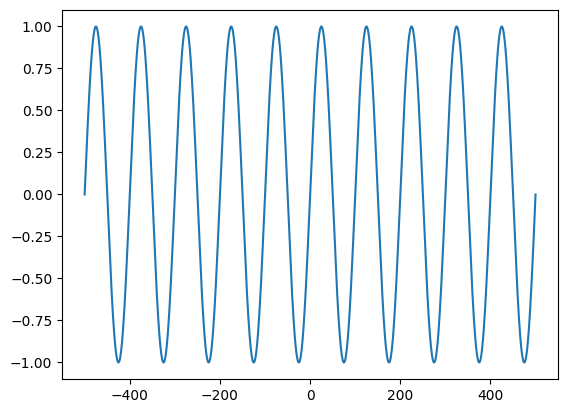

In [29]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

wavelength = 100
y = np.sin(2 * np.pi * x / wavelength)

plt.plot(x, y)
plt.show()

##### There are five waves present. This is what you’d expect since the wavelength is 200 units, and there are 1001 points in the array.

##### The endpoint is not included when using np.arange(), which is why 501 is used as the second argument. This array has 1001 elements. 

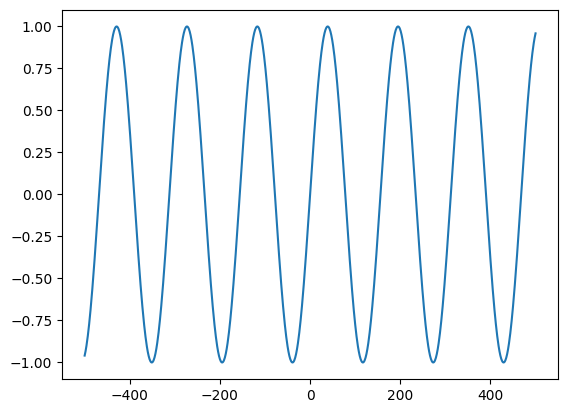

In [32]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

wavelength = 200
angle = np.pi / 9
y = np.sin(
    2*np.pi*(x*np.cos(angle) + x*np.sin(angle)) / wavelength
)

plt.plot(x, y)
plt.show()

### Moving from 1D sine to 2D sinusoidal grating

##### To translate this to a 2D grating, you’ll need to use np.meshgrid():
NumPy’s np.meshgrid() creates a 2D representation that can be used as the basis for 2D equations. I’m using capital X and Y to represent the 2D versions.

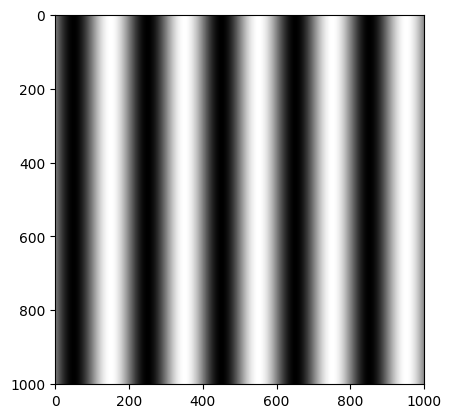

In [31]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

##### You can change the value of the variable wavelength to see how this affects the grating displayed. You can also replace X with Y to obtain a grating oriented along the vertical.

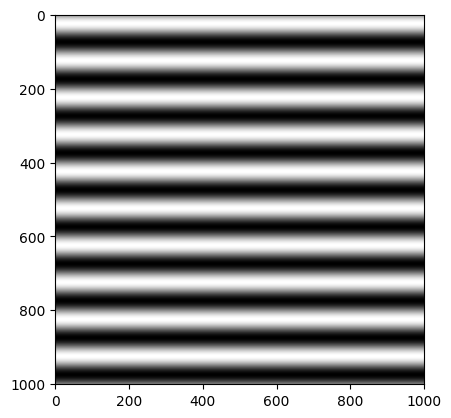

In [9]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100
grating = np.sin(2 * np.pi * Y / wavelength)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

#### If you want to create a grating with any other orientation, you’ll need to transform the axes to account for rotation, for example:

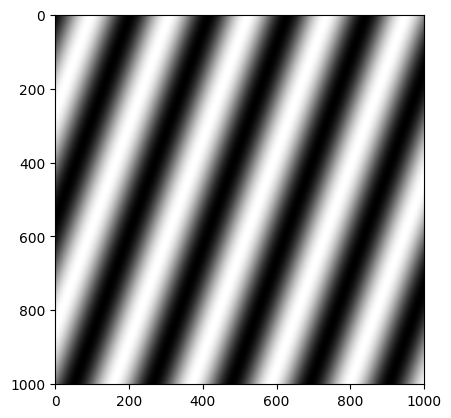

In [10]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
angle = np.pi / 9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

# The Fourier transform

Let’s take the two sinusoidal gratings you created and work out their Fourier transform using Python’s NumPy. First, you can return to the one oriented along the horizontal axis by setting angle = 0:

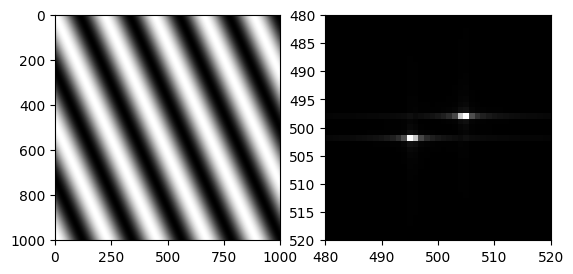

In [35]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
angle = 9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

## Add more than one gradients

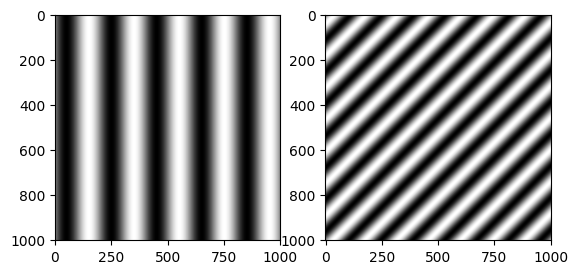

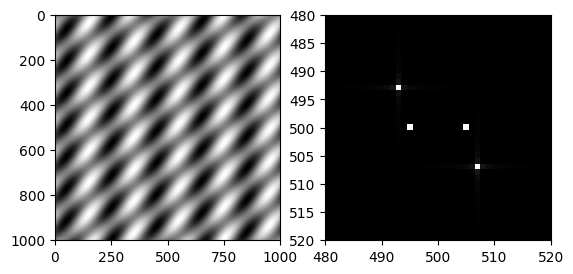

In [36]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength_1 = 200
angle_1 = 0
grating_1 = np.sin(
    2*np.pi*(X*np.cos(angle_1) + Y*np.sin(angle_1)) / wavelength_1
)
wavelength_2 = 100
angle_2 = np.pi/4
grating_2 = np.sin(
    2*np.pi*(X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2
)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating_1)
plt.subplot(122)
plt.imshow(grating_2)
plt.show()

gratings = grating_1 + grating_2

# Calculate Fourier transform of the sum of the two gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.figure()
plt.subplot(121)
plt.imshow(gratings)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

## Add more gradients

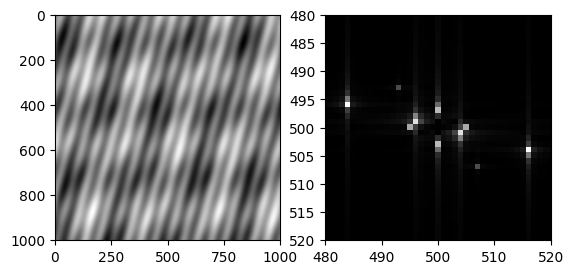

In [37]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / w_len
    )

# Calculate Fourier transform of the sum of the gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

## add a constant term to the gradient to add background to the image

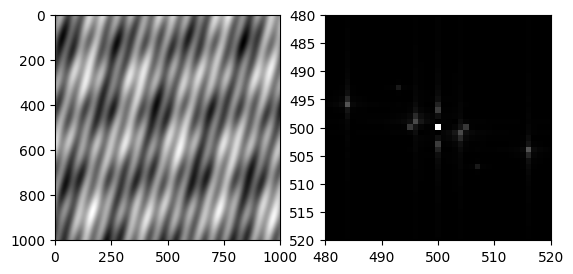

In [38]:
# gratings.py

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12

gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / w_len
    )

# Add a constant term to represent the background of image
gratings += 1.25

# Calculate Fourier transform of the sum of the gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

## 2D Fourier transform of an Image

(301, 301)


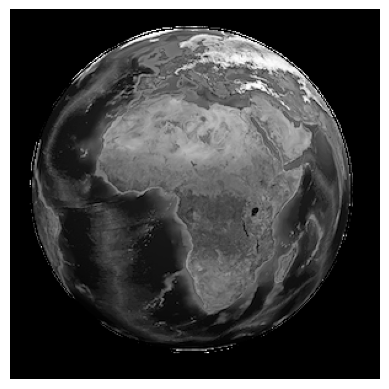

In [39]:
# Read image and convert to grayscale

import matplotlib.pyplot as plt

image_filename = "Earth.png"

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale
print(image.shape)

plt.set_cmap("gray")

plt.imshow(image)
plt.axis("off")
plt.show()

### Calculating the 2D Fourier Transform of The Image

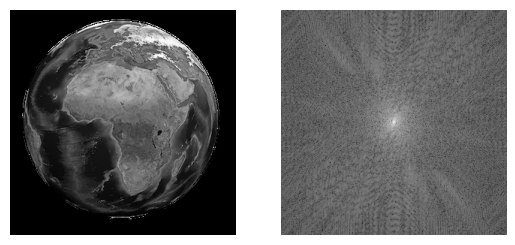

In [40]:
# fourier_synthesis.py

import numpy as np
import matplotlib.pyplot as plt

image_filename = "Earth.png"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

plt.set_cmap("gray")

ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()

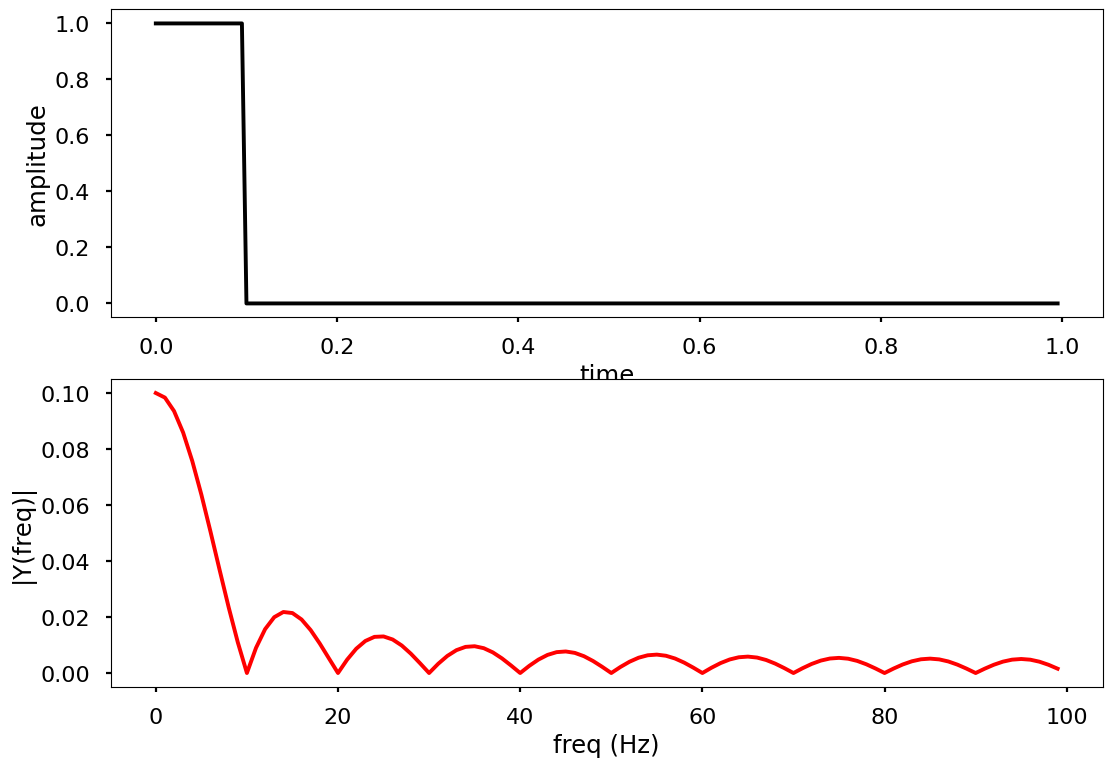

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

Fs = 200                         # sampling rate
Ts = 1.0/Fs                      # sampling interval
t = np.arange(0,1,Ts)            # time vector
ff = 5                           # frequency of the signal

nPulse = 20
y = np.ones(nPulse)
y = np.append(y, np.zeros(Fs-nPulse))

plt.subplot(2,1,1)
plt.plot(t,y,'k-')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(2,1,2)
n = len(y)                       # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
freq = frq[range(n//2)]           # one side frequency range

Y = np.fft.fft(y)/n              # fft computing and normalization
Y = Y[range(n//2)]

plt.plot(freq, abs(Y), 'r-')
plt.xlabel('freq (Hz)')
plt.ylabel('|Y(freq)|')

plt.show()

/var/folders/ng/h2qjbb7d4kn6kgyqj1hfgqqr0000gn/T/ipykernel_23832/4002137071.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


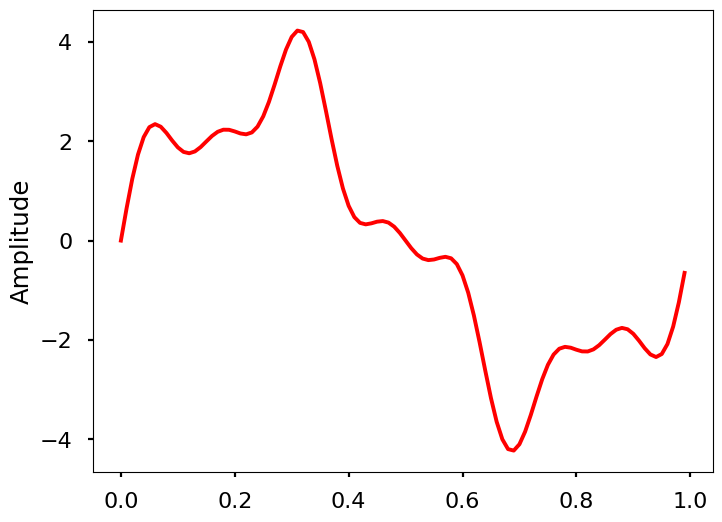

In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline


# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

TRY IT! Write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. Apply this function to the signal we generated above and plot the result.

In [57]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

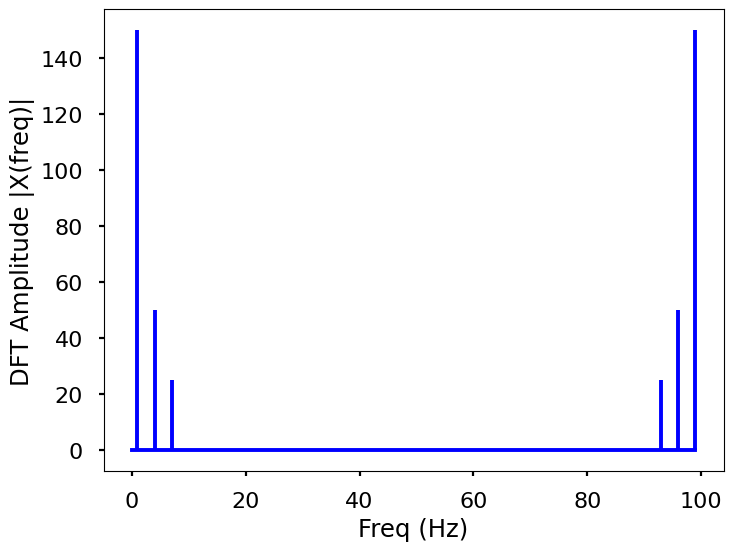

In [58]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

We can see from here that the output of the DFT is symmetric at half of the sampling rate (you can try different sampling rate to test). This half of the sampling rate is called Nyquist frequency or the folding frequency. This states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the highest frequency output from the DFT is half the sampling rate.

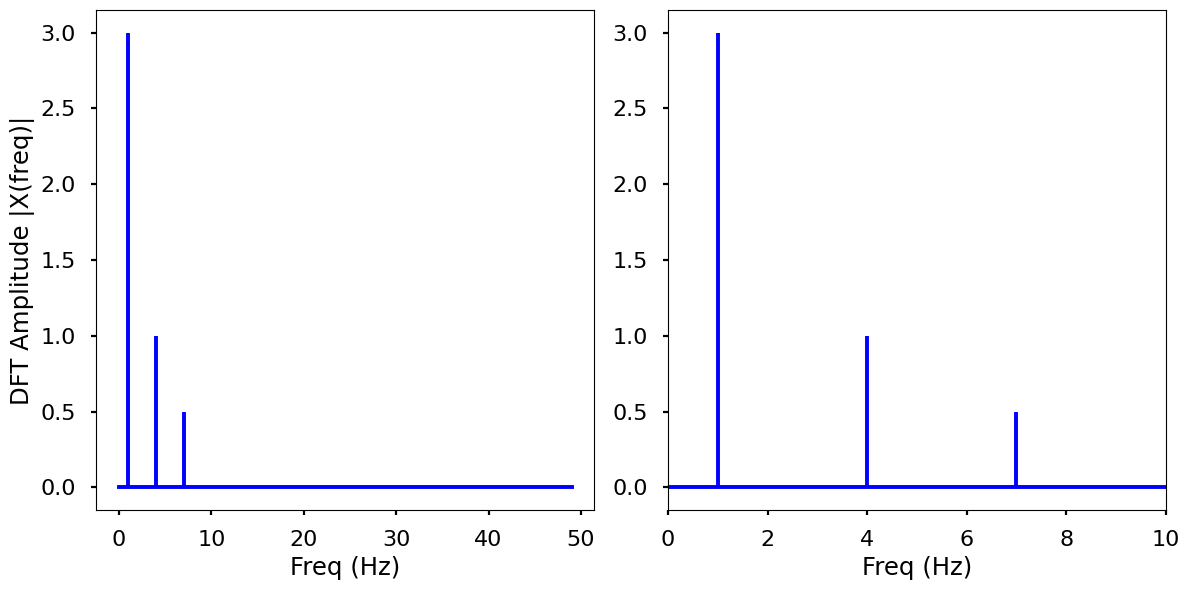

In [50]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

We can see by plotting the first half of the DFT results, we can see 3 clear peaks at frequency 1 Hz, 4 Hz, and 7 Hz, with amplitude 3, 1, 0.5 as expected. This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.

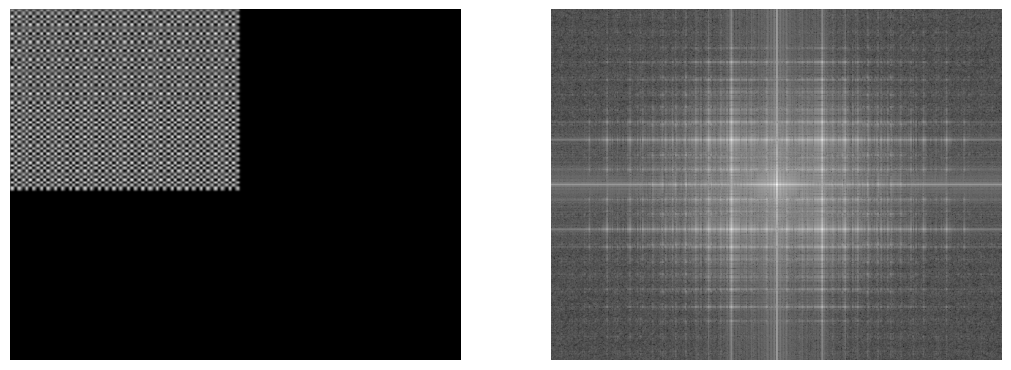

In [55]:
# fourier_synthesis.py

import numpy as np
import matplotlib.pyplot as plt

image_filename = "box-img.png"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

plt.set_cmap("gray")

ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()

## High pass and Low pass filter in frequency domain

Text(0.5, 0.95, '(squared) Butterworth filtering (order=3.0, npad=0)')

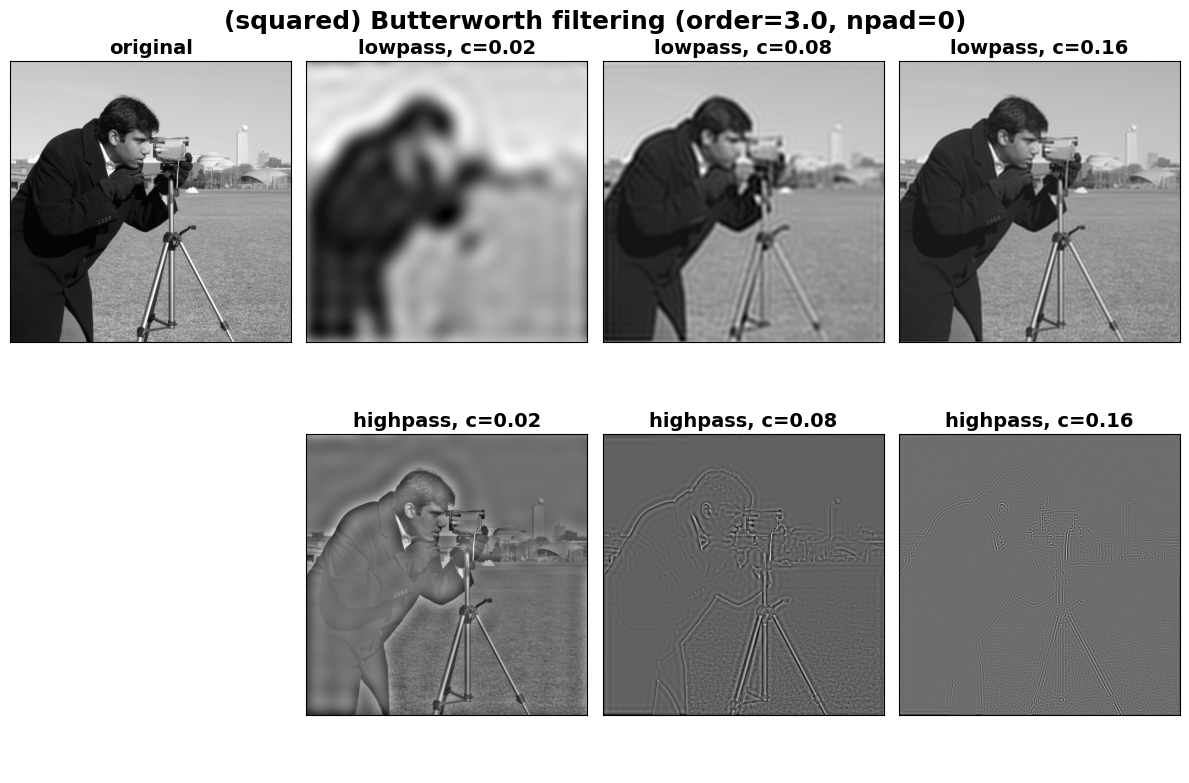

In [1]:
import matplotlib.pyplot as plt

from skimage import data, filters

image = data.camera()

# cutoff frequencies as a fraction of the maximum frequency
cutoffs = [0.02, 0.08, 0.16]


def get_filtered(image, cutoffs, squared_butterworth=True, order=10, npad=0):
    """Lowpass and highpass butterworth filtering at all specified cutoffs.

    Parameters
    ----------
    image : ndarray
        The image to be filtered.
    cutoffs : sequence of int
        Both lowpass and highpass filtering will be performed for each cutoff
        frequency in `cutoffs`.
    squared_butterworth : bool, optional
        Whether the traditional Butterworth filter or its square is used.
    order : float, optional
        The order of the Butterworth filter

    Returns
    -------
    lowpass_filtered : list of ndarray
        List of images lowpass filtered at the frequencies in `cutoffs`.
    highpass_filtered : list of ndarray
        List of images highpass filtered at the frequencies in `cutoffs`.
    """

    lowpass_filtered = []
    highpass_filtered = []
    for cutoff in cutoffs:
        lowpass_filtered.append(
            filters.butterworth(
                image,
                cutoff_frequency_ratio=cutoff,
                order=order,
                high_pass=False,
                squared_butterworth=squared_butterworth,
                npad=npad,
            )
        )
        highpass_filtered.append(
            filters.butterworth(
                image,
                cutoff_frequency_ratio=cutoff,
                order=order,
                high_pass=True,
                squared_butterworth=squared_butterworth,
                npad=npad,
            )
        )
    return lowpass_filtered, highpass_filtered


def plot_filtered(lowpass_filtered, highpass_filtered, cutoffs):
    """Generate plots for paired lists of lowpass and highpass images."""
    fig, axes = plt.subplots(2, 1 + len(cutoffs), figsize=(12, 8))
    fontdict = dict(fontsize=14, fontweight='bold')

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('original', fontdict=fontdict)
    axes[1, 0].set_axis_off()

    for i, c in enumerate(cutoffs):
        axes[0, i + 1].imshow(lowpass_filtered[i], cmap='gray')
        axes[0, i + 1].set_title(f'lowpass, c={c}', fontdict=fontdict)
        axes[1, i + 1].imshow(highpass_filtered[i], cmap='gray')
        axes[1, i + 1].set_title(f'highpass, c={c}', fontdict=fontdict)

    for ax in axes.ravel():
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    return fig, axes


# Perform filtering with the (squared) Butterworth filter at a range of
# cutoffs.
lowpasses, highpasses = get_filtered(image, cutoffs, squared_butterworth=True)

fig, axes = plot_filtered(lowpasses, highpasses, cutoffs)
titledict = dict(fontsize=18, fontweight='bold')
fig.text(
    0.5,
    0.95,
    '(squared) Butterworth filtering (order=3.0, npad=0)',
    fontdict=titledict,
    horizontalalignment='center',
)

Order of the Filter= 9
Cut-off frequency= 0.226 rad/s 


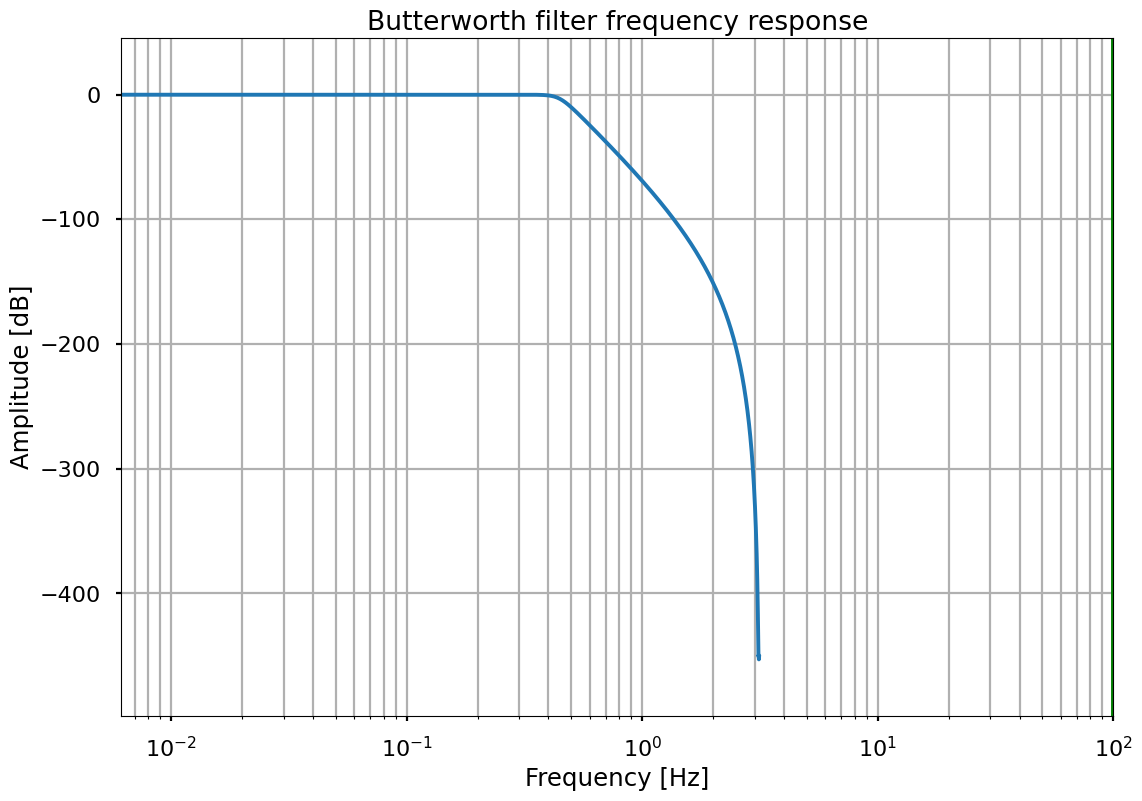

/var/folders/ng/h2qjbb7d4kn6kgyqj1hfgqqr0000gn/T/ipykernel_23832/2194150850.py:78: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(0, 40), imp, use_line_collection=True)
/var/folders/ng/h2qjbb7d4kn6kgyqj1hfgqqr0000gn/T/ipykernel_23832/2194150850.py:79: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(0, 40), response, use_line_collection=True)


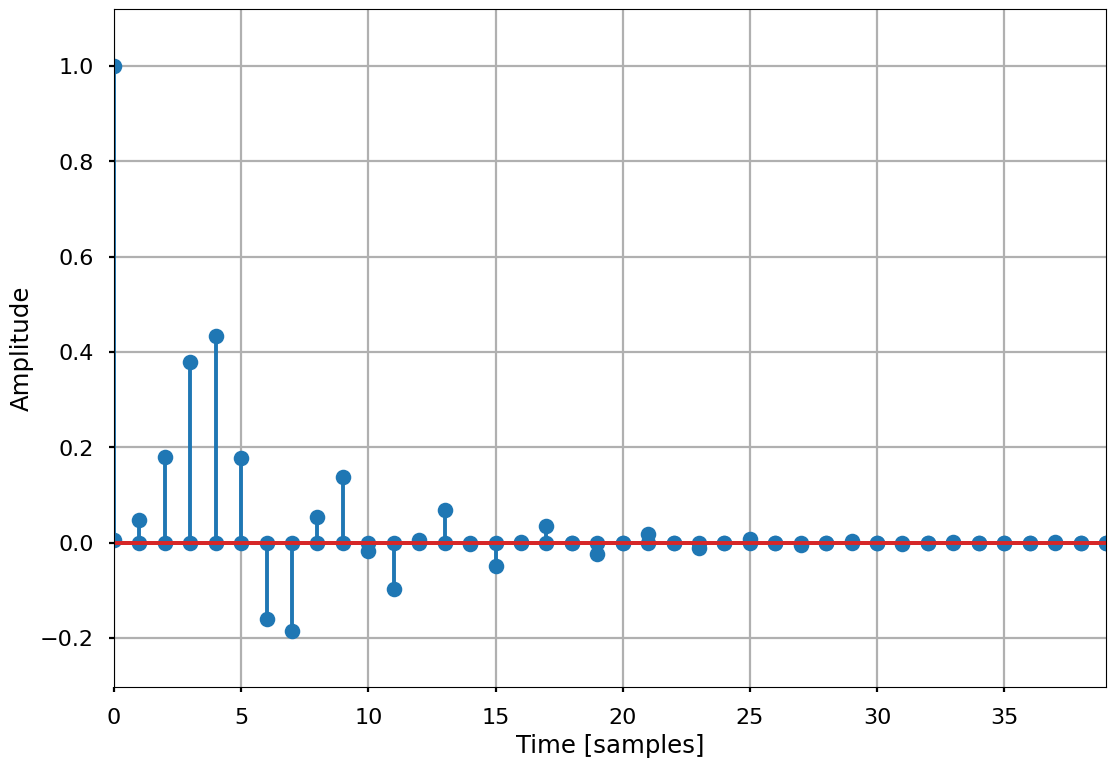

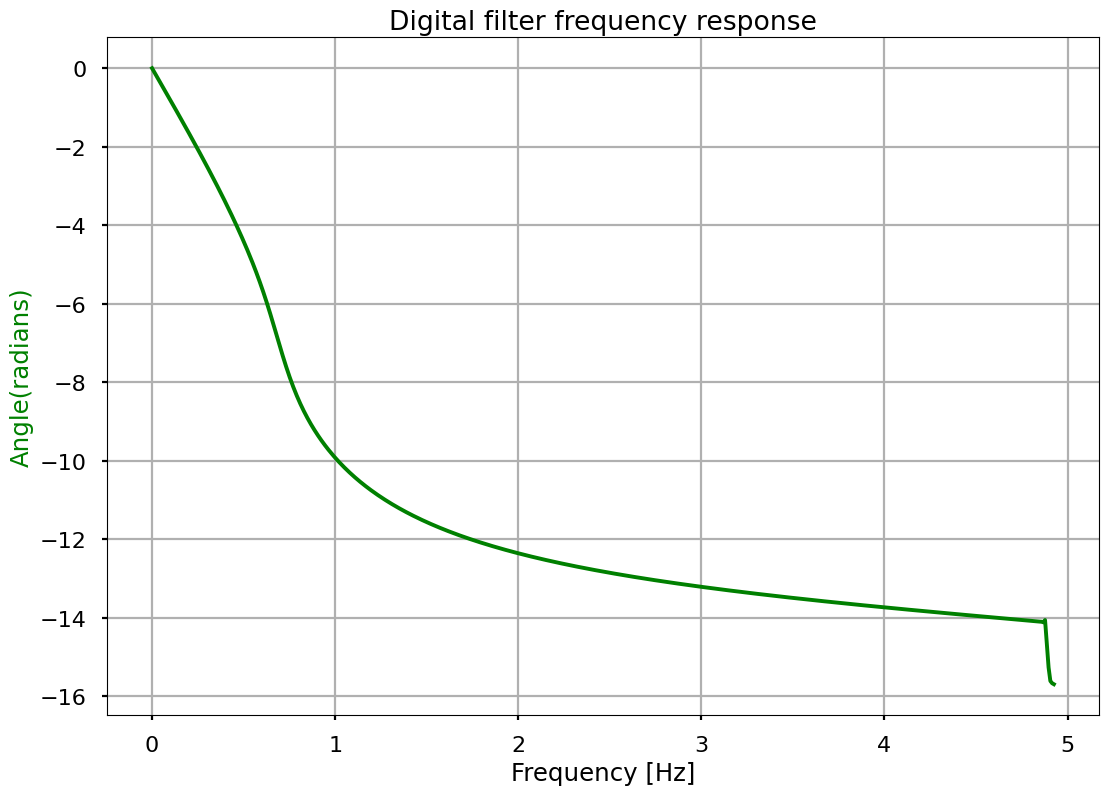

In [60]:
# import required modules 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math 


# Specifications of Filter 

# sampling frequency 
f_sample = 40000

# pass band frequency 
f_pass = 4000

# stop band frequency 
f_stop = 8000

# pass band ripple 
fs = 0.5

# pass band freq in radian 
wp = f_pass/(f_sample/2) 

# stop band freq in radian 
ws = f_stop/(f_sample/2) 

# Sampling Time 
Td = 1

# pass band ripple 
g_pass = 0.5

# stop band attenuation 
g_stop = 40


# Conversion to prewrapped analog frequency 
omega_p = (2/Td)*np.tan(wp/2) 
omega_s = (2/Td)*np.tan(ws/2) 


# Design of Filter using signal.buttord function 
N, Wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog=True) 


# Printing the values of order & cut-off frequency! 
print("Order of the Filter=", N) # N is the order 
# Wn is the cut-off freq of the filter 
print("Cut-off frequency= {:.3f} rad/s ".format(Wn)) 


# Conversion in Z-domain 

# b is the numerator of the filter & a is the denominator 
b, a = signal.butter(N, Wn, 'low', True) 
z, p = signal.bilinear(b, a, fs) 
# w is the freq in z-domain & h is the magnitude in z-domain 
w, h = signal.freqz(z, p, 512) 


# Magnitude Response 
plt.semilogx(w, 20*np.log10(abs(h))) 
plt.xscale('log') 
plt.title('Butterworth filter frequency response') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Amplitude [dB]') 
plt.margins(0, 0.1) 
plt.grid(which='both', axis='both') 
plt.axvline(100, color='green') 
plt.show() 


# Impulse Response 
imp = signal.unit_impulse(40) 
c, d = signal.butter(N, 0.5) 
response = signal.lfilter(c, d, imp) 
plt.stem(np.arange(0, 40), imp, use_line_collection=True) 
plt.stem(np.arange(0, 40), response, use_line_collection=True) 
plt.margins(0, 0.1) 
plt.xlabel('Time [samples]') 
plt.ylabel('Amplitude') 
plt.grid(True) 
plt.show() 


# Phase Response 
fig, ax1 = plt.subplots() 
ax1.set_title('Digital filter frequency response') 
ax1.set_ylabel('Angle(radians)', color='g') 
ax1.set_xlabel('Frequency [Hz]') 
angles = np.unwrap(np.angle(h)) 
ax1.plot(w/2*np.pi, angles, 'g') 
ax1.grid() 
ax1.axis('tight') 
plt.show() 
